In [1871]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [1872]:
# Fetch the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
df['MedHouseVal'] = california_housing.target

# Display the DataFrame
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [1873]:
df = df.drop( ['Latitude', 'Longitude'], axis = 1)

In [1874]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,2.611


In [1875]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


# Simple Regression

- Takes one independent variable and comes up with a function to determine the predictor or dependet variable. Let's pick the one that we see the most correlation. MedInc with MedHouseVal.

- A simple regression only has one independent variable (MedInc)


In [1876]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1877]:
x = df['MedInc']
y = df['MedHouseVal']

The idea of the regression is to see  the impact that MedInc has on MedHouseVal

In [1878]:
x = x.values.reshape(-1, 1) #reshape
y = y.values.reshape(-1, 1)

In [1879]:
model = LinearRegression()

In [1880]:
model.fit(x,y)

LinearRegression()

Our X variable is our MedInc
Our Y variable = MedHouseVal

In [1881]:
model.intercept_

array([0.45085577])

In [1882]:
model.coef_

array([[0.41793849]])

P_MedHouseVal = 0.45 + 0.42 * MedInc

In [1883]:
y_pred = model.predict(y)

In [1884]:
residuals = y - y_pred

In [1885]:
residuals

array([[2.18355462],
       [1.63583474],
       [1.5985828 ],
       ...,
       [0.086387  ],
       [0.04215033],
       [0.06950722]])

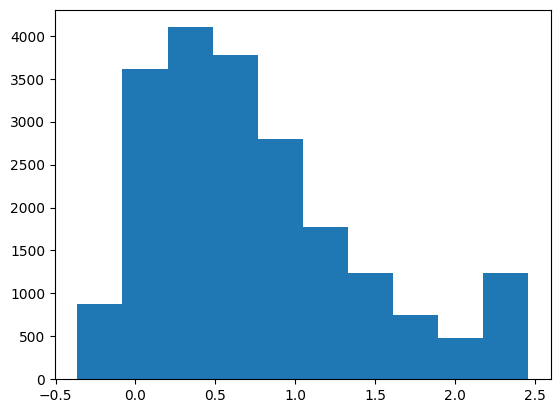

In [1886]:
residuals_hist = plt.hist(residuals)

What kind of normal distribution?

- Normal
- Mode - 0.5
-Left

residuals = actuak - y_predict
- Model is underestimating the value of the house.
+ residual when actual > pred
- When model is predicting too low. Underestimating the price of the house.

-Sd is 0.5. 68% of the values are being predicted too low. The range of underestimation is between 0 and 1. Our model is predicting 0 to 1, too low, compared to the actual value.


## Residual analysis with Actual vs Predicted

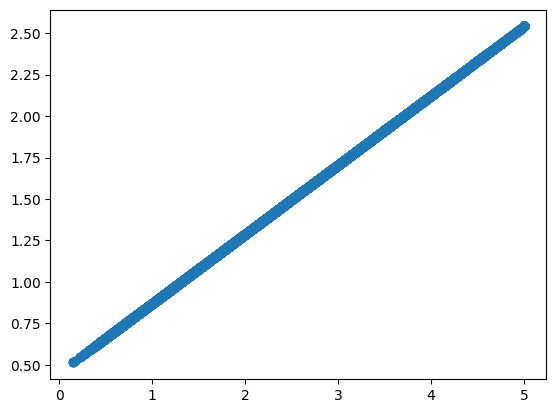

In [1887]:
plt.scatter(y,y_pred)

##R2

In [1888]:
r2 = r2_score(y, y_pred)
print(r2)

0.2351832856137711


- R2 - measures variance,
- Ideally, in your model, you want to capture as much varince as possible and also keep it as generic as possible.
- all models are wrong. some are helpful
- The Variance is measured by 0 -1, where ir the best, 0 is the worst.
- Our R2 is 0.24, is our model good or bed?
-HORRIBLE MODEL.
- 0.24 is very small R2. The Model is unable to capture the variance.
- The median income, does not have an impact according to R2 on MedHouseVal.
- The variance of median income, as a predictor, has little to no impact on MedHouseVal.

##MSE

In [1889]:
mse = mean_squared_error(y, y_pred)
print(mse)

1.0183919255485652


In [1890]:
residuals
residuals_sum = sum(residuals)

In [1891]:
residuals_sum #total sum of errors

array([15545.47668921])

In [1892]:
mean = residuals_sum/len(residuals)

In [1893]:
mean

array([0.75317232])

In [1894]:
mse = mean_squared_error(y, y_pred)
print(mse)

1.0183919255485652


- Y - P_predicted
- Sums up residuals
- Sqrt of it.

MSE is good to be low - You want your errors to be as small as possible.

# Model 1 - Simple Regression (MedInc as X, MedHouseVal as Y)

- Residuals: close to 0.5
- R2 -0.24
- MSE - 1.01

Overall, how would you rate this model?

Overall the model is not a very good model, however this woudl be somethign called as a baseline model, we are going to be using this model as a benchmark to find scores above. This is the worst that model can do.

# In class activity - Forward selection

## Model 2

In [1895]:
a = df.drop(['MedHouseVal', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'], axis = 1)

In [1896]:

b = df['MedHouseVal']

In [1897]:
a.head(10)

,MedInc,HouseAge
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0
3,5.6431,52.0
4,3.8462,52.0
5,4.0368,52.0
6,3.6591,52.0
7,3.1200,52.0
8,2.0804,42.0
9,3.6912,52.0


In [1898]:
model2 = LinearRegression()






In [1899]:
model2.fit(a,b)

LinearRegression()

In [1900]:
model2.intercept_

-0.1018903275908265

In [1901]:
model2.coef_

array([0.43169191, 0.01744134])

In [1902]:
b_pred = model2.predict(a)

In [1903]:
residuals2 = b - b_pred

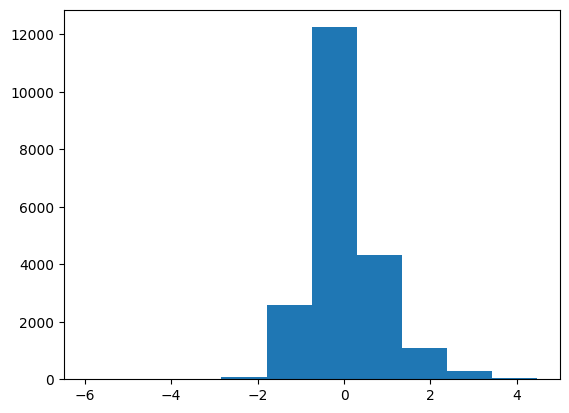

In [1904]:
residuals_hist = plt.hist(residuals2)

In [1905]:
r2 = r2_score(b, b_pred)
print(r2)

0.5091195899765227


In [1906]:
residuals
residuals_sum = sum(residuals)

In [1907]:
mean = residuals_sum/len(residuals)

In [1908]:
mse = mean_squared_error(b, b_pred)
print(mse)

0.653631957271042


## Model 3

In [1909]:
x = df.drop(['MedHouseVal', 'AveBedrms', 'Population', 'AveOccup'], axis = 1)

In [1910]:
y = df['MedHouseVal']

In [1911]:
x.head(10)

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853
5,4.0368,52.0,4.761658
6,3.6591,52.0,4.931907
7,3.1200,52.0,4.797527
8,2.0804,42.0,4.294118
9,3.6912,52.0,4.970588


In [1912]:
model3 = LinearRegression()

In [1913]:
model3.fit(x,y)

LinearRegression()

In [1914]:
y_pred = model3.predict(x)

In [1915]:
residuals3 = y - y_pred

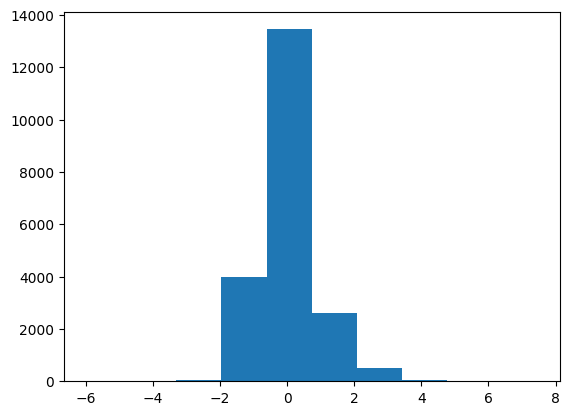

In [1916]:
residuals_hist = plt.hist(residuals3)

In [1917]:
r2 = r2_score(y, y_pred)
print(r2)

0.5121018839958533


In [1918]:
residuals
residuals_sum = sum(residuals)

In [1919]:
mean = residuals_sum/len(residuals)
print(mean)

[0.75317232]


In [1920]:
mse = mean_squared_error(y, y_pred)
print(mse)

0.6496608827746702


##Model 4

In [1921]:
x = df.drop(['MedHouseVal', 'Population', 'AveOccup'], axis = 1)

In [1922]:
x.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms
0,8.3252,41.0,6.984127,1.023810
1,8.3014,21.0,6.238137,0.971880
2,7.2574,52.0,8.288136,1.073446
3,5.6431,52.0,5.817352,1.073059
4,3.8462,52.0,6.281853,1.081081
5,4.0368,52.0,4.761658,1.103627
6,3.6591,52.0,4.931907,0.951362
7,3.1200,52.0,4.797527,1.061824
8,2.0804,42.0,4.294118,1.117647
9,3.6912,52.0,4.970588,0.990196


In [1923]:
model4 = LinearRegression()

In [1924]:
model4.fit(x,y)

LinearRegression()

In [1925]:
y_predict = model4.predict(x)

In [1926]:
model4.intercept_

-0.3958003163829842

In [1927]:
model4.coef_

array([ 0.53648081,  0.01581909, -0.21298304,  0.99487246])

In [1928]:
residuals4 = y - y_pred

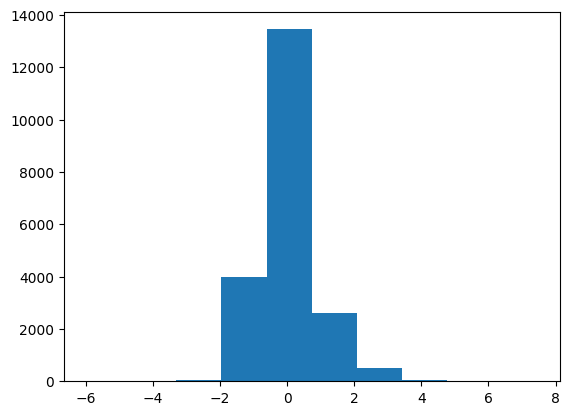

In [1929]:
residuals_hist = plt.hist(residuals4)

In [1930]:
residuals
residuals_sum = sum(residuals)

In [1931]:
mean = residuals_sum/len(residuals)
print(mean)

[0.75317232]


In [1932]:
mse = mean_squared_error(y, y_pred)
print(mse)


0.6496608827746702


In [1933]:
r2 = r2_score(y, y_pred)
print(r2)


0.5121018839958533


##Model 5

In [1934]:
c = df.drop(['MedHouseVal','Population'], axis = 1)

In [1935]:
d = df['MedHouseVal']

In [1936]:
c.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup
0,8.3252,41.0,6.984127,1.023810,2.555556
1,8.3014,21.0,6.238137,0.971880,2.109842
2,7.2574,52.0,8.288136,1.073446,2.802260
3,5.6431,52.0,5.817352,1.073059,2.547945
4,3.8462,52.0,6.281853,1.081081,2.181467
5,4.0368,52.0,4.761658,1.103627,2.139896
6,3.6591,52.0,4.931907,0.951362,2.128405
7,3.1200,52.0,4.797527,1.061824,1.788253
8,2.0804,42.0,4.294118,1.117647,2.026891
9,3.6912,52.0,4.970588,0.990196,2.172269


In [1937]:
model5 = LinearRegression()

In [1938]:
model5.fit(c, d)

LinearRegression()

In [1939]:
d_pred = model5.predict(c)

In [1940]:
model5.intercept_

-0.3857230481830731

In [1941]:
model5.coef_

array([ 0.5374324 ,  0.01587149, -0.21385808,  0.99845266, -0.00470154])

In [1942]:
residuals5 = d - d_pred

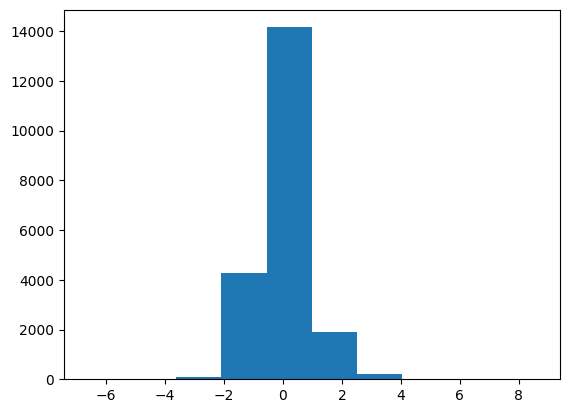

In [1943]:
residuals_hist = plt.hist(residuals5)

In [1944]:
residuals_sum = sum(residuals)

In [1945]:
mean = residuals_sum/len(residuals)
print(mean)

[0.75317232]


In [1946]:
mse = mean_squared_error(d, d_pred)
print(mse)


0.6134744351670054


In [1947]:
r2 = r2_score(d, d_pred)
print(r2)


0.5392780617230045


##Model 6

In [1948]:
e = df.drop(['MedHouseVal'], axis = 1)

In [1949]:
f = df['MedHouseVal']

In [1950]:
e.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269


In [1951]:
model6 = LinearRegression()

In [1952]:
model6.fit(e, f)

LinearRegression()

In [1953]:
f_pred = model6.predict(e)

In [1954]:
model6.intercept_

-0.43909342142814944

In [1955]:
model6.coef_

array([ 5.36910326e-01,  1.65033593e-02, -2.11740382e-01,  9.93729775e-01,
        2.21093787e-05, -4.87715048e-03])

In [1956]:
residuals6 = f - f_pred

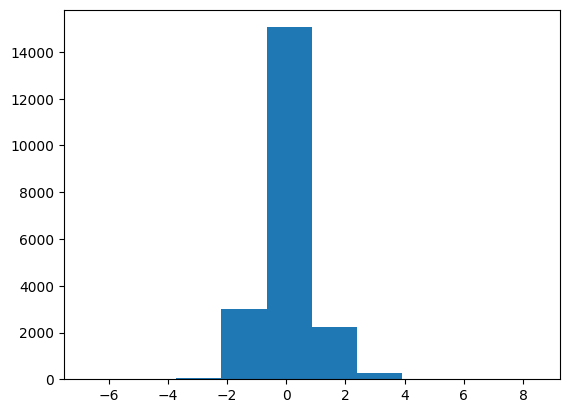

In [1957]:
residuals_hist = plt.hist(residuals6)

In [1958]:
residuals_sum = sum(residuals)

In [1959]:
mean = residuals_sum/len(residuals)
print(mean)

[0.75317232]


In [1960]:
mse = mean_squared_error(f, f_pred)
print(mse)


0.6129156196698703


In [1961]:
r2 = r2_score(f, f_pred)
print(r2)


0.5396977345638283


<function matplotlib.pyplot.show(close=None, block=None)>

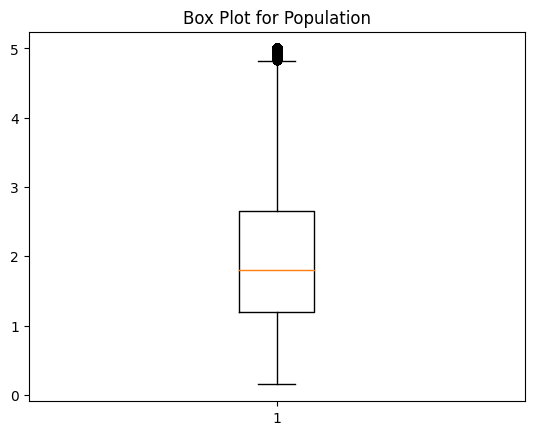

In [1966]:
plt.boxplot(y)

plt.title('Box Plot for Population')

plt.show

In [1963]:
subset_df=df[df['Population']<4.5]

<Axes: >

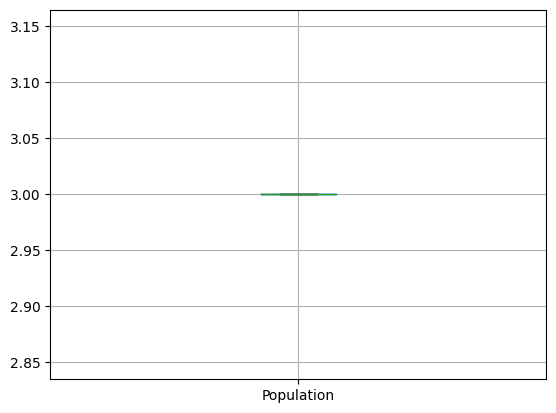

In [1964]:
subset_df.boxplot('Population')

- Forward selection:

* Adding variables one a time.
* Model 2 - MedInc and House Age
* Model 3 - MedInc, HouseAge, AveRms
* Model 4 - MedInc - AveBdrms
* Model 5 - MedInc - Population
* Model 6 - MedInc - AveOccup


- Backward selection:

*Everything and then remove variables until you find the model that works the best.